Lezione 4 - My First Neural Network



*   Tensorflow and Keras
*   My First Neural Network



#Tensorflow


*   Nata come proggetto interno a Google (DistBelief), sviluppato da Google Brain nel 2011.
*   Codice rilasciato **open source nel 2015** con licenza Apache License 2.0.
*   **Keras** diventa interfaccia principale dal 2019 con **TensorFlow 2.0**
*   Il suo principale concorrente è Pytorch, creato da Facebook.

##Tensorflow in pratica

Nasce come framework per svolgere calcolo differenziale sui tensori.
Simile a numpy quindi però ha delle features in piu quali:

Riesce ad esegure anche su GPUs e TPUs.
Fa calcolo differenziale e quindi può computare direttamente qualsiasi equazione differenziabile di tensori.
La computazione può essere distribuita verso un grande numero di dispositivi o su una singola macchina o un grande numero di macchine ( potenzialmente con molti devices in ognuno)


E quindi Oggi tensorflow è diventata una end-to-end machine learning platform:

*   Metodi per preparare e caricare i dati.
*   Metodi per costruire modelli di ML.
*   Metodi per il deploy di ML
*   Metodi per mettere in produzione un modello di ML.



##TF strenghts


1.   Efficiently executing low-level tensor operations on CPU, GPU, or TPU.

2.   Computing the gradient of arbitrary differentiable expressions.

3.   Scaling computation to many devices, such as clusters of hundreds of GPUs.

4.   Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices.


#Keras
Keras consente di costruire, addestrare e valutare reti neurali in modo efficiente e flessibile tramite un interfaccia di alto livello molto flessibile e facile da usare.

E' la api di default per TensorFlow, questo vuol dire che quando una rete neurale in keras, stiamo creando un modello di tensorflow.

> [Keras Ecosystem](https://keras.io/getting_started/ecosystem/)


##Create a Keras model


**Functional API**

In [85]:
from keras.layers import Input, Dense
from keras.models import Model

def build_neural_network():
  in_layer = Input(shape=(4,), name="Input_Layer")
  x = Dense(units=128, activation='relu', name="Hidden_Layer_1")(in_layer)
  x = Dense(units=64, activation='relu', name="Hidden_Layer_2")(x)
  x = Dense(units=32, activation='relu', name="Hidden_Layer_3")(x)
  out_layer = Dense(units=10, activation='softmax',name="Output_Layer")(x)
  model = Model(inputs=in_layer, outputs=out_layer, name="MyFirstNeuralNetwork")
  return model

model = build_neural_network()

In [86]:
model.summary()

Model: "MyFirstNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,306 (44.16 KB)

 Trainable params: 11,306 (44.16 KB)

 Non-trainable params: 0 (0.00 B)

**Class Inerithance mode**

In [87]:
import tensorflow as tf
from tensorflow import keras

class MyNeuralNetwork(keras.Model):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.dense1 = keras.layers.Dense(64, activation='relu', name="Dense1")
        self.dense2 = keras.layers.Dense(32, activation='relu', name="Dense2")
        self.dense3 = keras.layers.Dense(32, activation='relu', name="Dense3")
        self.dense4 = keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return x

model = MyNeuralNetwork()

**Sequantial mode**

In [88]:
model = keras.Sequential(
    [
        keras.layers.Dense(2, activation="relu", name="layer1"),
        keras.layers.Dense(3, activation="relu", name="layer2"),
        keras.layers.Dense(4, name="layer3"),
    ]
)

##Layers

A single perceptron is made of:

![PERCEPTRON](https://drive.google.com/uc?id=1aCVcbcOYQCzyqRdftlclmqfoUXtOsu6M )

**L'algoritmo di backpropagation in un nustshell:**

*   Dati gli input calcola tutti gli output pesati e le attivazioni per ogni layer.
*   Calcola l'errore per l'ultimo layer usando la funzione di costo.
*   Propaga l'informazione all'indietro calcolando layer per layer il gradiente dell'errore rispetto ai pesi e ai bias.
*   Usa un algorimto di ottimizzazione come il gradient descent per aggiornare bias e pesi dal gradiente calcolato.


[TensorFlowPlayground](https://playground.tensorflow.org/#activation=sigmoid&regularization=L2&batchSize=11&dataset=spiral&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=50&networkShape=2,1&seed=0.16959&showTestData=true&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


[Blog](https://cloud.google.com/blog/products/ai-machine-learning-understanding-neural-networks-with-tensorflow-playground)

Un esmepio di Fully connected layer di keras.

*   Units.
*   Kernel e Bias.
*   Activation Function.

Quindi vediamo come sono organizzati e come possiamo usarli

In [89]:
import tensorflow as tf
from keras.layers import Dense
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import MinMaxNorm, NonNeg


layer = Dense(
    units=32,
    activation="relu",
    use_bias=True,

    #Inizializzazione dei pesi
    kernel_initializer=tf.keras.initializers.Ones(),
    bias_initializer=tf.keras.initializers.Zeros(),

    #Regolarizzatori
    kernel_regularizer=l1(l1=0.01), #Regolarizzazione Lasso, l1 * reduce_sum(abs(x))
    bias_regularizer=l2(l2=0.01),   #Regolarizzazione Ridge, l2 * reduce_sum(square(x))
    activity_regularizer=l1_l2(l1=0.01, l2=0.01), #penalty = l1 * reduce_sum(abs(x)) + l2*reduce_sum(square(x))

    #Vincoli
    kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.0),
    bias_constraint=NonNeg()
)



*   Gli initializer determinano come vengono inizializzati i pesi della rete influenzando la convergenza dell'addestramento.

*   I regularizer in Keras servono per controllare l'overfitting nei modelli
neurali,ad esempio aggiungendo una penalità ai pesi della rete durante l'addestramento indirettamente si modifica l'output rendendolo piu generale.

*    I constraints su intervalli, possono migliorare la stabilità del modello.

### Overfitting
L'overfitting in deep learning avviene quando un modello addestrato ha una prestazione eccellente ai dati di addestramento, al punto da perdere la sua capacità di generalizzazione su nuovi dati, dove invece si riscontra una prestazione significativamente peggiore.

Cause possibili di overfitting:

- Modello troppo intelligente, riduci la sua complessità.
- Scarso volume di dati, aumentali.
- Scarsa qualità nei dati: rumore o errori possono confondere il modello.

L'obiettivo è trovare un equilibrio tra l'adattamento ai dati di addestramento e la capacità di generalizzazione su nuovi dati.

##Training

Compilare il modello prima di chiamare il fit

In [90]:
### Training Hyperparamenters
epochs_num=100
batch_size=32
lr = 0.0001
opt = ...
loss_fun = ...
metrics_list = [..., ..., ...]

def create_model():
  # return build_neural_network()
  return MyNeuralNetwork()

#model = create_model()
#model.compile( loss=loss_fun, optimizer=opt, metrics=metrics_list )
#model.fit( x_train, y_train, epochs=epochs_num, batch_size=batch_size, validation_data=(x_valid,y_valid) )

Il metodo "compile" richiede almeno due componenti essenziali senza i quali il fit non può funzionare:

*   Loss Function: La funzione serve a comparare i valori target con l'output del modello e quantifica l'errore che the optimizer tenta di minimizzare.

*   Optimizer: componente che determina le regole per cui fare l'update dei pesi del modello durante il training.

Il metodo compile inoltre può prendere altri parametri opzionali come le metriche che forniscono un monitoring delle performance del modello durante il training.

**Optimizers**..https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

Questo processo di aggiornamento dei pesi può essere basato su varie tecniche di ottimizzazione:

- SGD = discesa del gradiente stocastica.
- Adam= Adaptive Moment Estimation.
- RMSProp= root mean square propagation.
- ...

Keras mette a disposizione le implementazioni degli algoritmi degli optimizers.

In [91]:
from keras.optimizers import SGD, Adam, AdamW, RMSprop,schedules

#possiamo definire l'algorimto usando il nome
optimizer="adam"
optimizer="sgd"
optimizer="rmsp"

#keras implementa gli algo di opt, ognuno ha i suoi iperparamentri.
sgd = SGD(learning_rate=0.01)
adam = Adam(learning_rate=0.01)
adamw = AdamW(learning_rate=0.01)
rmsprop = RMSprop(learning_rate=0.001)

#keras implementa diversi algoritmi di learning rate scheduling:
lr_schedule_exp = schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)
lr_schedule_pol = schedules.PolynomialDecay(initial_learning_rate=1e-2,decay_steps=10000,end_learning_rate=0.0001)
lr_schedule_cos = schedules.CosineDecay(initial_learning_rate=1e-2, decay_steps=10000, alpha=0.0)

optimizer = AdamW( learning_rate=lr_schedule_cos )

**Loss Functions**...
- https://keras.io/api/losses/



In [92]:
from keras.losses import MeanSquaredError,MeanAbsoluteError,BinaryCrossentropy,KLDivergence,Huber,Loss

# Dati di esempio
y_true = tf.constant([0.0, 1.0, 1.0, 0.0])
y_pred = tf.constant([0.1, 0.9, 0.8, 0.2])

class CustomLoss(Loss):
    def __init__(self, name="custom_loss"):
        super(CustomLoss, self).__init__(name=name)
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))


def custom_loss_fun(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


#Regressions
mse = MeanSquaredError()
mse_loss = mse(y_true, y_pred)


mae = MeanAbsoluteError()
mae_loss = mae(y_true, y_pred)

#Comportamento quadratico per piccoli errori, lineare per grandi errori
huber= Huber()
huber_loss = huber(y_true, y_pred)


#Probability Based
kl = KLDivergence()
kl_loss = kl(y_true, y_pred)


costum = CustomLoss()
custom_loss_function = custom_loss_fun(y_true, y_pred)
class_loss = costum(y_true, y_pred)


print("Mean Squared Error:", mse_loss)
print("Mean Absolute Error:", mae_loss)
print("KL Divergence:", kl_loss)
print("Huber Loss:", huber_loss)
print("Custom Loss (Using a Function):", custom_loss_function)
print("Custom Loss (Subclassing Loss):", class_loss)

Mean Squared Error: tf.Tensor(0.025000002, shape=(), dtype=float32)
Mean Absolute Error: tf.Tensor(0.15, shape=(), dtype=float32)
KL Divergence: tf.Tensor(0.32850125, shape=(), dtype=float32)
Huber Loss: tf.Tensor(0.012500001, shape=(), dtype=float32)
Custom Loss (Using a Function): tf.Tensor(0.025000002, shape=(), dtype=float32)
Custom Loss (Subclassing Loss): tf.Tensor(0.025000002, shape=(), dtype=float32)


### Vediamo il grafico di qualche funzione di Loss

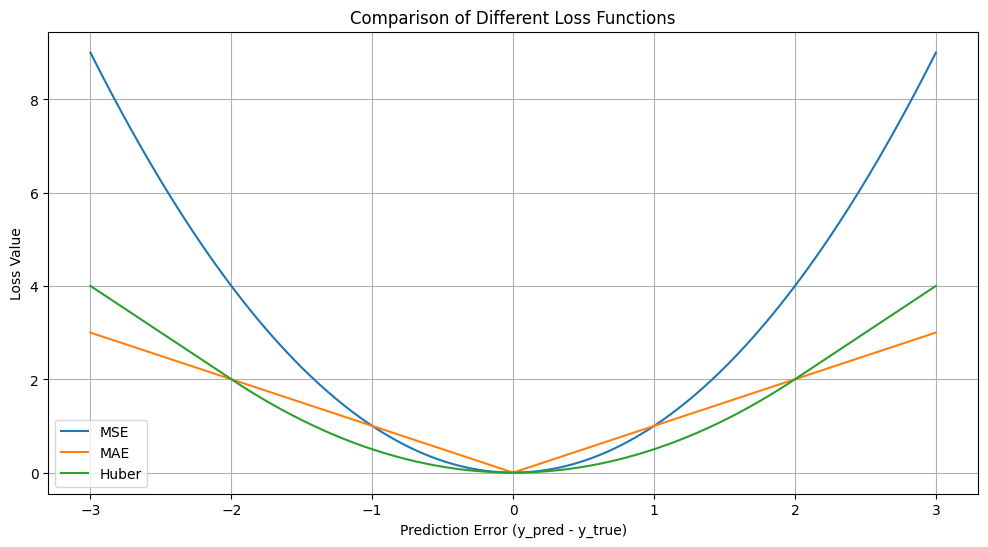

In [93]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



# Crea una gamma di valori di errore tra y_true e y_pred
error_range = np.linspace(-3, 3, 500)
y_true = np.zeros_like(error_range)  # y_true è zero per semplicità
y_pred = error_range  # y_pred varia per simulare l'errore

# Calcolo delle perdite punto per punto
mse = tf.keras.losses.MeanSquaredError()
mse_loss = [mse(np.asarray([yt]), np.asarray([yp])).numpy() for yt, yp in zip(y_true, y_pred)]

mae = tf.keras.losses.MeanAbsoluteError()
mae_loss = [mae(np.asarray([yt]), np.asarray([yp])).numpy() for yt, yp in zip(y_true, y_pred)]

huber = tf.keras.losses.Huber(delta=2.0)
huber_loss = [huber(np.asarray([yt]), np.asarray([yp])).numpy() for yt, yp in zip(y_true, y_pred)]


# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(error_range, mse_loss, label="MSE")
plt.plot(error_range, mae_loss, label="MAE")
plt.plot(error_range, huber_loss, label="Huber")
plt.xlabel("Prediction Error (y_pred - y_true)")
plt.ylabel("Loss Value")
plt.title("Comparison of Different Loss Functions")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

# Etichette di classe iniziali
y_true_indices = np.array([0, 1, 2, 1, 0])

# Trova i valori unici
unique_values, _ = tf.unique(y_true_indices)
# Calcola il numero di elementi distinti
num_classes = tf.size(unique_values)

#Converti in one hot encoding
y_true_one_hot = tf.one_hot(y_true_indices, depth=num_classes)

# Probabilità predette per ciascuna classe
y_pred = np.array([[0.8, 0.1, 0.1],
                   [0.2, 0.7, 0.1],
                   [0.1, 0.2, 0.7],
                   [0.3, 0.6, 0.1],
                   [0.7, 0.2, 0.1]])


cce_fun = CategoricalCrossentropy()
loss_cce = cce_fun(y_true_one_hot, y_pred)


sce_fun = SparseCategoricalCrossentropy()
loss_sce = sce_fun(y_true_indices, y_pred)

print("Loss con CategoricalCrossentropy:", loss_cce.numpy() )
print("Loss con SparseCategoricalCrossentropy:", loss_sce.numpy() )

**Metrics**...
*   https://keras.io/api/metrics/


In [95]:
from keras.metrics import Accuracy, Precision,Recall, F1Score, MeanAbsolutePercentageError
accuracy = Accuracy()
precision = Precision()
recall = Recall()
f1_score = F1Score()
mae_percentage = MeanAbsolutePercentageError()

#sklearn, scipy e altre, possono aiutare.

Esempio

In [96]:
# Dati di esempio
y_true = tf.constant([[0.0], [1.0], [1.0], [0.0]], dtype=tf.float32)
y_pred = tf.constant([[0.0],[1.0], [1.0], [1.0]], dtype=tf.float32)


accuracy.update_state(y_true, y_pred)
precision.update_state(y_true, y_pred)
recall.update_state(y_true, y_pred)
f1_score.update_state(y_true, y_pred)

# Metrica di regressione
mae_percentage = MeanAbsolutePercentageError()
mae_percentage.update_state(y_true, y_pred)


# Ottieni i risultati delle metriche
accuracy_result = accuracy.result().numpy()
precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
f1_score_result = f1_score.result().numpy()

print("Accuracy:", accuracy_result)
print("Precision:", precision_result) #riduce i falsi positivi
print("Recall:", recall_result) #riduce i falsi negativi
print("F1 Score:", f1_score_result)

Accuracy: 0.75
Precision: 0.6666667
Recall: 1.0
F1 Score: [0.79999995]


Tutto insieme

In [97]:
import tensorflow as tf
import keras
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import AdamW,Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy



def load_and_preprocess_iris_dataset( test_split, valid_split, seed):
    # Carica il dataset Iris
    iris = load_iris()

    # Estrai le features e le etichette
    X = iris.data
    y = iris.target
    unique_values, _ = tf.unique(y)

    no_classes = tf.size(unique_values) # Trova il numero di classi uniche nel vettore delle etichette

    #Simple preprocessing
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    # y_encoded = tf.one_hot(y, depth=no_classes)

    # Suddivisione stratificata in set di addestramento e test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=seed, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=valid_split, random_state=seed, stratify=y_train)

    y_train = tf.one_hot(y_train, depth=no_classes)
    y_val = tf.one_hot(y_val, depth=no_classes)
    y_test =  tf.one_hot(y_test, depth=no_classes)

    print("Dataset Info:")
    print(f"Class labels = {unique_values}")
    print(f"X_Training set shape = {tf.shape(X_train)}")
    print(f"X_Validation set shape = {tf.shape(X_val)}")
    print(f"X_Test set shape = {tf.shape(X_test)}")
    print(f"min features value {tf.reduce_min(X_train)}")
    print(f"max features value {tf.reduce_max(X_train)}")
    return (X_train,y_train),(X_val,y_val),(X_test,y_test)



##Hyperparamenters
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism() #influenza le prestazioni


data_input_shape=(4,)
data_output_shape=3
lr = 0.001
opt=Adam( learning_rate = lr)
# opt = AdamW(learning_rate=lr, weight_decay=0.01)
loss_fun = CategoricalCrossentropy()
accuracy = CategoricalAccuracy(name="acc")

num_epochs=30
batch_size=2

(X_train, y_train), (X_val, y_val), (X_test, y_test), = load_and_preprocess_iris_dataset(test_split=0.2, valid_split=0.125, seed=seed)


def my_first_neural_network(input_shape, output_shape ):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Hidden layers with more neurons
    x = Dense(8, activation='relu')(input_layer)
    x = Dense(8, activation='relu')(x)

    # Output layer
    output_layer = Dense(output_shape, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model


model_b = my_first_neural_network(input_shape=data_input_shape, output_shape=data_output_shape)

model_b.compile(loss=loss_fun, optimizer=opt, metrics=[ accuracy ])
# model.summary()

# Addestramento del modello
history = model_b.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size, shuffle=True)

Dataset Info:
Class labels = [0 1 2]
X_Training set shape = [105   4]
X_Validation set shape = [15  4]
X_Test set shape = [30  4]
min features value 0.0
max features value 1.0
Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.3383 - loss: 1.0647 - val_acc: 0.3333 - val_loss: 1.0449
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3383 - loss: 1.0256 - val_acc: 0.3333 - val_loss: 0.9840
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3383 - loss: 0.9768 - val_acc: 0.3333 - val_loss: 0.9225
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3756 - loss: 0.9259 - val_acc: 0.5333 - val_loss: 0.8677
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6392 - loss: 0.8791 - val_acc: 0.7333 - val_loss: 0.8195
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7728 - loss: 0.8373 - val_acc: 0.8000 - val_loss: 0.7792
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7542 - loss: 0.8004 - val_acc: 0.8000 - val_loss: 0.7481
Epoch 8/30


Grazie ad history, tornato dal fit, possiamo monitorare e visualizzare il comportamento del modello durante il training e questo ci permette di fare il tuning degli iperparamentri.
Ad esempio, di seguito plottiamo i risultati...

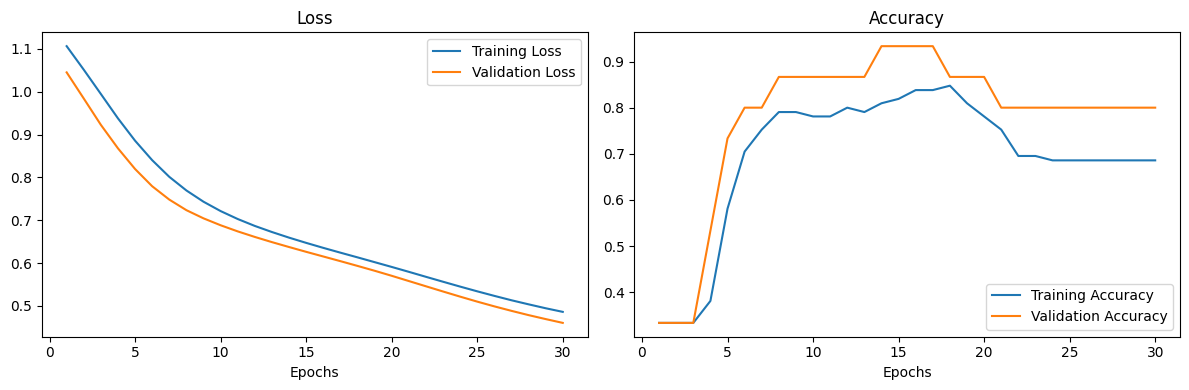

In [98]:
import matplotlib.pyplot as plt

def plot_training_history(history, num_epochs):

    # Estrai la loss di training e validation
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Estrai le metriche di training e validation
    training_metrics = history.history['acc']
    validation_metrics = history.history['val_acc']

    # Crea un grafico
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, label='Training Loss')
    plt.plot(epochs, validation_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_metrics, label='Training Accuracy')
    plt.plot(epochs, validation_metrics, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history, num_epochs)

Aumentiamo il livello di difficoltà e facciamoci una nostra categorical loss entropy



$$
L(y_{\text{true}}, y_{\text{pred}}) = - \frac{1}{N} \sum_{j=1}^{N} \sum_{i=1}^{C} y_{\text{true},ij} \cdot \log(y_{\text{pred},ij})
$$

dove:
- $( y_{\text{true}} $) : rappresenta le etichette reali in formato one-hot (un vettore di zeri con un solo uno per classe),
- $( y_{\text{pred}} $) : rappresenta le probabilità previste per ciascuna classe, dopo essere state scalate per evitare instabilità numeriche,
- $( C $) : è il numero delle classi.
- $( N $) è il numero totale delle osservazioni,

La cross-entropy misura la differenza tra le probabilità vere e quelle previste, penalizzando maggiormente le previsioni lontane dalle etichette reali e favorendo probabilità elevate per le classi corrette.


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.4931 - loss: 1.1036 - val_acc: 0.6667 - val_loss: 1.0580
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7296 - loss: 1.0436 - val_acc: 0.6667 - val_loss: 1.0124
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7296 - loss: 0.9948 - val_acc: 0.6667 - val_loss: 0.9700
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7440 - loss: 0.9486 - val_acc: 0.6667 - val_loss: 0.9243
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7440 - loss: 0.8995 - val_acc: 0.6667 - val_loss: 0.8716
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7440 - loss: 0.8442 - val_acc: 0.6667 - val_loss: 0.8157
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7440 - loss: 0.7887 - val_acc: 0.6667 - val_loss: 0.7598
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7440 - loss: 0.7319 - val_acc: 0.6667 - val_loss: 0.7052
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7440 - loss: 

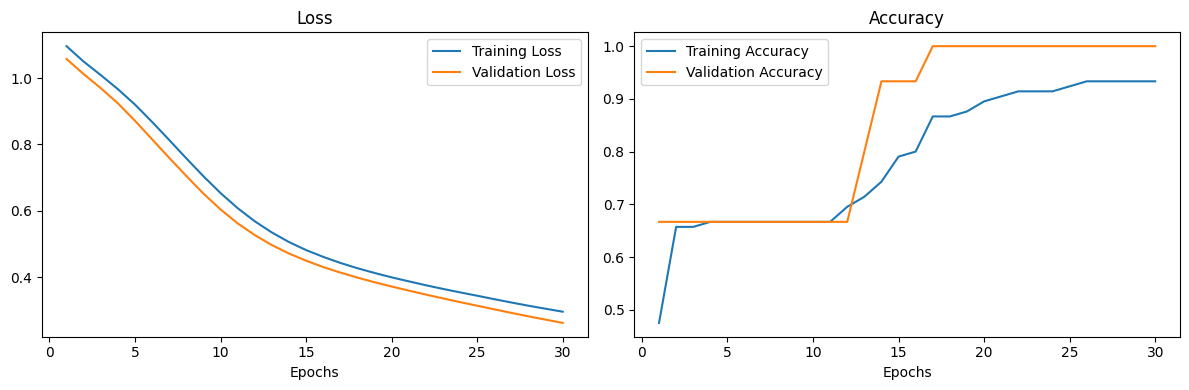

In [99]:
# Definizione della funzione di perdita personalizzata
def my_categorical_crossentropy(y_true, y_pred):
    epsilon = 1e-8  # Aggiunto per evitare divisione per zero
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)  # Clip delle probabilità che devono essere comprese tra [0,1]
    losses = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(losses)

lr = 0.001
opt=Adam( learning_rate = lr)

model = my_first_neural_network(input_shape=data_input_shape, output_shape=data_output_shape)
model.compile(loss=my_categorical_crossentropy, optimizer=opt, metrics=[ accuracy ])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)
plot_training_history(history, num_epochs)

##Evaluate

In [100]:
(loss_value, acc_value) =  model.evaluate( X_val, y_val , batch_size=8 )

print(f"Val loss is {float(loss_value)}")
print(f"Val Accuracy is {float(acc_value)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - loss: 0.2531 
Val loss is 0.2620413303375244
Val Accuracy is 1.0


In [101]:
(loss_value, acc_value) =  model.evaluate( X_test, y_test , batch_size=8 )

print(f"Test loss is {float(loss_value)}")
print(f"Test Accuracy is {float(acc_value)}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9058 - loss: 0.2685 
Test loss is 0.2909121811389923
Test Accuracy is 0.8999999761581421


##Predict

In [102]:
preds = model.predict( X_test, batch_size=8 )
print( np.round( preds , 3 ) )

results = np.argmax(preds, axis=1 )
print("\nPredicted Labels")
print( results )

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
[[0.975 0.025 0.001]
 [0.003 0.51  0.488]
 [0.134 0.703 0.162]
 [0.101 0.706 0.193]
 [0.981 0.019 0.   ]
 [0.008 0.677 0.316]
 [0.99  0.009 0.   ]
 [0.976 0.024 0.   ]
 [0.001 0.362 0.637]
 [0.017 0.713 0.27 ]
 [0.    0.168 0.832]
 [0.    0.298 0.702]
 [0.    0.232 0.767]
 [0.009 0.686 0.305]
 [0.983 0.017 0.   ]
 [0.981 0.019 0.   ]
 [0.993 0.007 0.   ]
 [0.031 0.698 0.271]
 [0.007 0.61  0.383]
 [0.003 0.538 0.459]
 [0.988 0.012 0.   ]
 [0.    0.228 0.771]
 [0.006 0.598 0.396]
 [0.001 0.353 0.646]
 [0.    0.212 0.788]
 [0.002 0.451 0.547]
 [0.008 0.639 0.353]
 [0.983 0.017 0.   ]
 [0.001 0.365 0.634]
 [0.983 0.017 0.   ]]

Predicted Labels
[0 1 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 2 1 0 2 0]


In [103]:
preds = model( X_test)
results = np.argmax( preds, axis=1 )
print("Predicted Labels")
print( results )

Predicted Labels
[0 1 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 2 1 0 2 0]


Diffrenza fra i due modi di fare inferenza è che uno chiama la classe call, invece il predict è specificamente progettato per fare inferenza. Infatti non ha un parametro batch_size

###Salvare e caricare i pesi di un modello

In [104]:
model.save_weights("nome_file.weights.h5")
model.load_weights("nome_file.weights.h5")

Attenzione state salvando o caricando solo i pesi del modello non la sua struttura.

In [105]:
model_b.save("model.keras")

loaded_model = tf.keras.models.load_model("model.keras")

Questo salva la sua struttura ma esistono altri metodi per farlo che non saranno discussi in questa lezione.

##Advanced Topics

###Custom Train

Eventualmente possiamo anche andare piu a basso livello ed allenare il modello usando il gradient tape.

In [106]:
##Loss function
def my_categorical_crossentropy(y_true, y_pred):
    epsilon = 1e-8  # Aggiunto per evitare divisione per zero
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)  # Clip delle probabilità
    losses = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(losses)


def train_step(x,y):

  with tf.GradientTape() as tape: #E' un context che "registra" le operazioni e poi de alloca la memoria
      # forward process
      predictions = model(x)
      # Calcola la loss
      loss = my_categorical_crossentropy(y, predictions)

  # Calcola i gradienti
  gradients = tape.gradient(loss, model.trainable_variables)

  # Applica gli aggiornamenti ai pesi del modello
  opt.apply_gradients(zip(gradients, model.trainable_variables))

  return loss


#Hyperparameters
num_epochs = 10
batch_size = 4
lr = 0.01
opt=Adam( learning_rate = lr)
model = my_first_neural_network(input_shape=data_input_shape, output_shape=data_output_shape)

trainset = tf.data.Dataset.from_tensor_slices( (X_train,y_train) ).batch( batch_size )

for epoch in range(num_epochs):
  print(f"Epoch {epoch + 1}/{num_epochs}")
  steps_per_epoch = len(trainset)
  prog_bar = tf.keras.utils.Progbar(steps_per_epoch, unit_name='batch')
  for step, (x,y) in enumerate( trainset):

    loss_value = train_step(x , y)

    # Log every 5 batches.
    if step % 5 == 0:
      values = [ ('loss', float(loss_value)) ]
      prog_bar.update((step+3), values=values )


print( f"\nTraining completato" )


Epoch 1/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/batch - loss: 1.0365
Epoch 2/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/batch - loss: 0.7449
Epoch 3/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/batch - loss: 0.5420
Epoch 4/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/batch - loss: 0.4614
Epoch 5/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/batch - loss: 0.3668
Epoch 6/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/batch - loss: 0.2478
Epoch 7/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/batch - loss: 0.1629
Epoch 8/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/batch - loss: 0.1158
Epoch 9/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/batch - loss: 0.0873
Epoch 10/10
28/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/batch - loss: 0.0692

Training completato


###Lambda layer

In [107]:
from keras.layers import Input, Dense,Lambda
from keras.models import Model

def my_lambda_pow(x):
  return x**3

def build_neural_network():
  in_layer = Input(shape=(100,), name="Input_Layer")
  x = Dense(units=128, activation='relu', name="Hidden_Layer_1")(in_layer)
  x = Dense(units=64, activation='relu', name="Hidden_Layer_2")(x)
  x = Dense(units=32, activation='relu', name="Hidden_Layer_3")(x)
  x = Lambda ( my_lambda_pow , name="Lambda_Layer" )(x)
  out_layer = Dense(units=10, activation='softmax',name="Output_Layer")(x)
  model = Model(inputs=in_layer, outputs=out_layer)

  return model

model = build_neural_network()
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_1 (Dense)               │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Lambda_Layer (Lambda)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,594 (92.16 KB)

 Trainable params: 23,594 (92.16 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.scale = tf.Variable(1.)
    def call(self, inputs):
        return inputs * self.scale



def build_neural_network():
  in_layer = Input(shape=(100,), name="Input_Layer")
  x = Dense(units=128, activation='relu', name="Hidden_Layer_1")(in_layer)
  x = Dense(units=64, activation='relu', name="Hidden_Layer_2")(x)
  x = Dense(units=32, activation='relu', name="Hidden_Layer_3")(x)
  x= CustomLayer(name="Lambda_Layer" )(x)
  out_layer = Dense(units=10, activation='softmax',name="Output_Layer")(x)
  model = Model(inputs=in_layer, outputs=out_layer, name="Model_X")

  return model

model = build_neural_network()
model.summary()

Model: "Model_X"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_1 (Dense)               │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Lambda_Layer (CustomLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,594 (92.16 KB)

 Trainable params: 23,594 (92.16 KB)

 Non-trainable params: 0 (0.00 B)

###Callbacks

In [113]:
from keras.callbacks import EarlyStopping

# Definisci la callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitora la loss sulla metrica indicata
    min_delta=0.001,      # Variazione minima da considerare come miglioramento
    patience=10,          # Numero di epoche senza miglioramenti prima di fermare l'addestramento
    mode='auto',          # oppure prende "min","max", seleziona la direzione in automatico
    baseline=0.5,         # Baseline per il controllo,default è None.
    restore_best_weights=True,  # Ripristina i pesi migliori quando l'addestramento si ferma
    start_from_epoch=5    # Inizia il monitoraggio dall'epoca 5
)

lr = 0.001
opt=Adam( learning_rate = lr)
num_epochs=250
model = my_first_neural_network(input_shape=data_input_shape, output_shape=data_output_shape)
model.compile(loss=my_categorical_crossentropy, optimizer=opt, metrics=[ accuracy ])
# Addestramento del modello
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size, callbacks=[early_stopping] )

Epoch 1/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.5434 - loss: 1.0369 - val_acc: 0.3333 - val_loss: 1.0608
Epoch 2/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3949 - loss: 1.0129 - val_acc: 0.3333 - val_loss: 1.0345
Epoch 3/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3949 - loss: 0.9926 - val_acc: 0.3333 - val_loss: 1.0073
Epoch 4/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4168 - loss: 0.9702 - val_acc: 0.3333 - val_loss: 0.9786
Epoch 5/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4354 - loss: 0.9476 - val_acc: 0.3333 - val_loss: 0.9533
Epoch 6/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5530 - loss: 0.9241 - val_acc: 0.4667 - val_loss: 0.9263
Epoch 7/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6510 - loss: 0.8964 - val_acc: 0.6667 - val_loss: 0.8952
Epoch 8/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7181 - loss: 0.8645 - val_acc: 0.6667 - val_loss: 0.8597
Epoch 9/400
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7346